In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from matplotlib import rc
%matplotlib inline

# 주피터 노트북 한글 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Users\Junhan\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Junhan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### NB, kNN, Logistic, SVM 비교

In [2]:
# Load datasets
cancer = pd.read_csv('data/wdbc2.csv', header=None)

In [3]:
# column[0] = id, column[1] = malignity or benign
y = cancer[1]
x = cancer.drop([0,1], axis=1) # axis = 1 일 때 세로축 삭제

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
# GaussianNB
NB = GaussianNB().fit(X_train, y_train)

# kNN (n_neighbors 입력)
kNN = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Logistic (C 입력, penalty "l1" or "l2")
logistic = LogisticRegression(C=100, penalty="l1").fit(X_train, y_train)

# SVM (C 입력, gamma 입력)
svm = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)

# DecisionTree (max_depth 입력)
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

C:\Users\Junhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Junhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
# 점수
print("GaussianNB 훈련 세트 점수 : {:.3f}".format(NB.score(X_train, y_train)))
print("GaussianNB 테스트 세트 점수 : {:.3f}".format(NB.score(X_test, y_test)))
print("============================================")
print("kNN 훈련 세트 점수 : {:.3f}".format(kNN.score(X_train, y_train)))
print("kNN 테스트 세트 점수 : {:.3f}".format(kNN.score(X_test, y_test)))
print("============================================")
print("Logistic 훈련 세트 점수 : {:.3f}".format(logistic.score(X_train, y_train)))
print("Logistic 테스트 세트 점수 : {:.3f}".format(logistic.score(X_test, y_test)))
print("============================================")
print("SVM 훈련 세트 점수 : {:.3f}".format(svm.score(X_train, y_train)))
print("SVM 테스트 세트 점수 : {:.3f}".format(svm.score(X_test, y_test)))
print("============================================")
print("Tree 훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("Tree 테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))

GaussianNB 훈련 세트 점수 : 0.943
GaussianNB 테스트 세트 점수 : 0.930
kNN 훈련 세트 점수 : 0.945
kNN 테스트 세트 점수 : 0.974
Logistic 훈련 세트 점수 : 0.987
Logistic 테스트 세트 점수 : 0.939
SVM 훈련 세트 점수 : 1.000
SVM 테스트 세트 점수 : 0.658
Tree 훈련 세트 점수 : 0.989
Tree 테스트 세트 점수 : 0.930


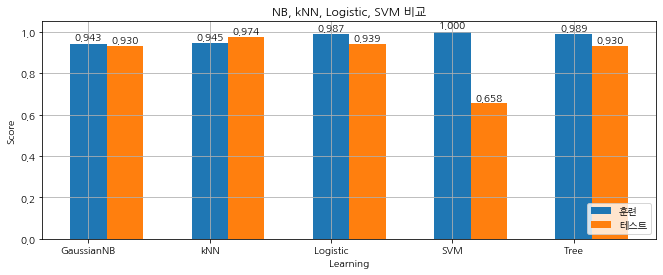

In [7]:
# 시각화
learning = ["GaussianNB", "kNN", "Logistic", "SVM", "Tree"]
data1 = [NB.score(X_train, y_train), kNN.score(X_train, y_train), logistic.score(X_train, y_train), svm.score(X_train, y_train), tree.score(X_train, y_train)]
data2 = [NB.score(X_test, y_test), kNN.score(X_test, y_test), logistic.score(X_test, y_test), svm.score(X_test, y_test), tree.score(X_test, y_test)]

fig, ax = plt.subplots(1,1,figsize=(11,4))
W_ = 0.3

x = np.arange(5)
bar1 = ax.bar(x, data1, align='center', width=W_, label='훈련')
bar2 = ax.bar([i+W_ for i in range(len(data2))], data2, align='center', width=W_, label='테스트')
plt.xticks(x, learning)

for i, bar in enumerate(bar1):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data1[i], ha='center')

for i, bar in enumerate(bar2):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data2[i], ha='center')
    
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Learning')
plt.ylabel('Score')
plt.title('NB, kNN, Logistic, SVM 비교')

plt.show()

In [8]:
# 테스트 세트에서 랜덤으로 10개 추출
x_test_random = X_test.sample(n=10)
x_test_random_index = x_test_random.index

y_test_random = []
for i in x_test_random_index:
    y_test_random.append(y_test[i])

NB_predict = NB.predict(x_test_random)
kNN_predict = kNN.predict(x_test_random)
Logistic_predict = logistic.predict(x_test_random)
SVM_predict = svm.predict(x_test_random)
Tree_predict = tree.predict(x_test_random)

df = pd.DataFrame({"실제값":y_test_random, "NB":NB_predict, "kNN":kNN_predict, "Logisitic":Logistic_predict, "SVM":SVM_predict, "Tree":Tree_predict})
df

실제값 NB kNN Logisitic SVM Tree
0   B  B   B         B   B    B
1   B  B   B         B   B    B
2   B  B   B         B   B    B
3   M  M   M         M   B    M
4   M  M   M         M   B    B
5   B  B   B         B   B    B
6   B  B   B         B   B    B
7   B  B   B         B   B    B
8   B  B   B         B   B    B
9   M  M   M         M   B    M

In [9]:
count = 0
acc = []
for i in range(5):
    for j in range(10):
        if df.iloc[j,i] == df.iloc[j,i+1]:
            count += 1
    acc.append(count/10.0)
    count = 0
    
print("GaussianNB 테스트 세트 점수 : {:.1f}".format(acc[0]))
print("kNN 테스트 세트 점수 : {:.1f}".format(acc[1]))
print("Logistic 테스트 세트 점수 : {:.1f}".format(acc[2]))
print("SVM 테스트 세트 점수 : {:.1f}".format(acc[3]))
print("Tree 테스트 세트 점수 : {:.1f}".format(acc[4]))

GaussianNB 테스트 세트 점수 : 1.0
kNN 테스트 세트 점수 : 1.0
Logistic 테스트 세트 점수 : 1.0
SVM 테스트 세트 점수 : 0.7
Tree 테스트 세트 점수 : 0.8
